# Projeto Validação de modelos de clusterização

## Ambiente de desenvolvimento

### Versão do Python

In [70]:
!python --version


Python 3.10.6


### Provando que está rodando um venv e o ambiente de desenvolvimento ( VScode)

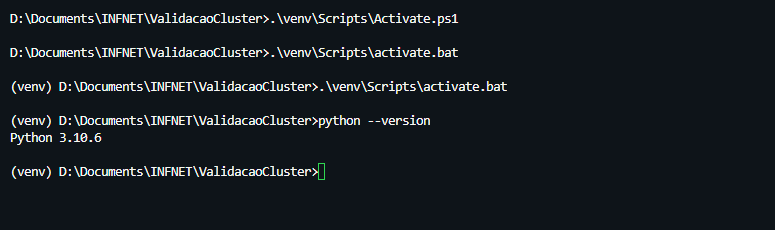

In [129]:
from IPython.display import Image
Image(filename='venv.png')

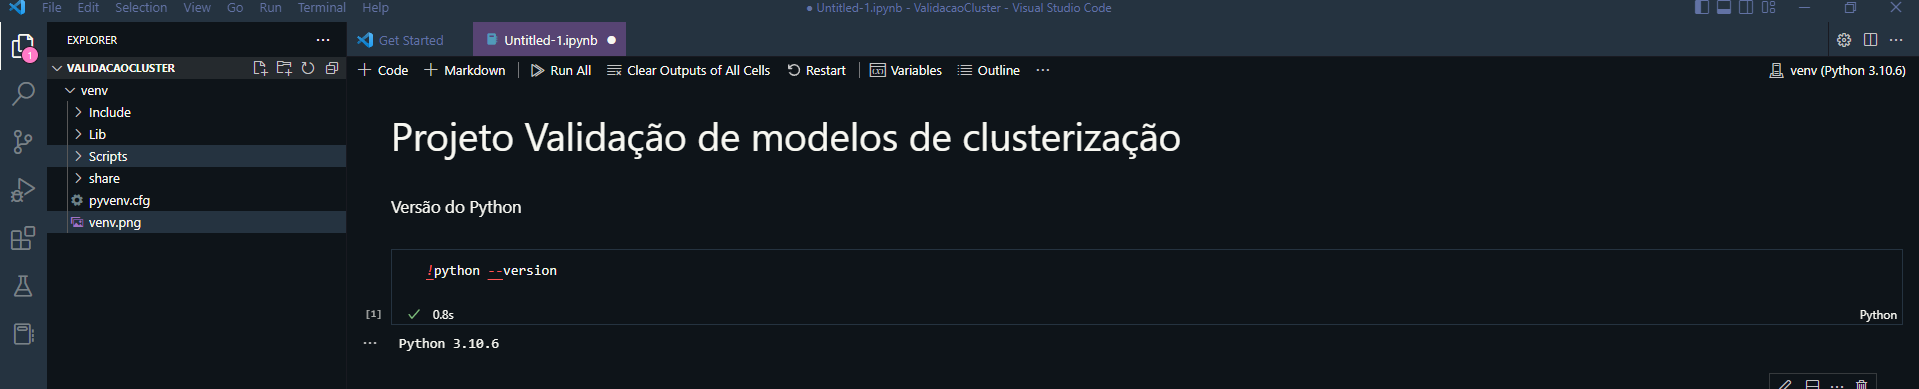

In [130]:
Image(filename='Vscode.png')

GitHub: https://github.com/LucasGasparello/infnet-ValidacaoCluster

## Base de dados

In [71]:
import pandas as pandas
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns


In [72]:
df = pandas.read_csv("Automobile_data.csv", sep=',', index_col=0)
df.head()

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,,,,,,,,,,,,,,,,,,,,,
3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


### Escreva a justificativa para a escolha de dados, dando sua motivação e objetivos.

A escolha de dados foi baseado na minha área de atuação (Telemetria e gestão de frotas de veículos), o objetivo desse trabalho é separar os veículos em grupos de riscos para uma seguradora, utilizando alguns paramêtros do veículo, como marca, preço, caracteristicas do motor, etc.

### Mostre através de gráficos a faixa dinâmica das variáveis que serão usadas nas tarefas de clusterização. Analise os resultados mostrados. O que deve ser feito com os dados antes da etapa de clusterização?

In [73]:
df.shape

(205, 25)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 3 to -1
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  205 non-null    object 
 1   make               205 non-null    object 
 2   fuel-type          205 non-null    object 
 3   aspiration         205 non-null    object 
 4   num-of-doors       205 non-null    object 
 5   body-style         205 non-null    object 
 6   drive-wheels       205 non-null    object 
 7   engine-location    205 non-null    object 
 8   wheel-base         205 non-null    float64
 9   length             205 non-null    float64
 10  width              205 non-null    float64
 11  height             205 non-null    float64
 12  curb-weight        205 non-null    int64  
 13  engine-type        205 non-null    object 
 14  num-of-cylinders   205 non-null    object 
 15  engine-size        205 non-null    int64  
 16  fuel-system        205 non-

In [75]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
wheel-base,205.0,98.756585,6.021776,86.6,94.5,97.0,102.4,120.9
length,205.0,174.049268,12.337289,141.1,166.3,173.2,183.1,208.1
width,205.0,65.907805,2.145204,60.3,64.1,65.5,66.9,72.3
height,205.0,53.724878,2.443522,47.8,52.0,54.1,55.5,59.8
curb-weight,205.0,2555.565854,520.680204,1488.0,2145.0,2414.0,2935.0,4066.0
engine-size,205.0,126.907317,41.642693,61.0,97.0,120.0,141.0,326.0
compression-ratio,205.0,10.142537,3.972040,7.0,8.6,9.0,9.4,23.0
city-mpg,205.0,25.219512,6.542142,13.0,19.0,24.0,30.0,49.0
highway-mpg,205.0,30.751220,6.886443,16.0,25.0,30.0,34.0,54.0


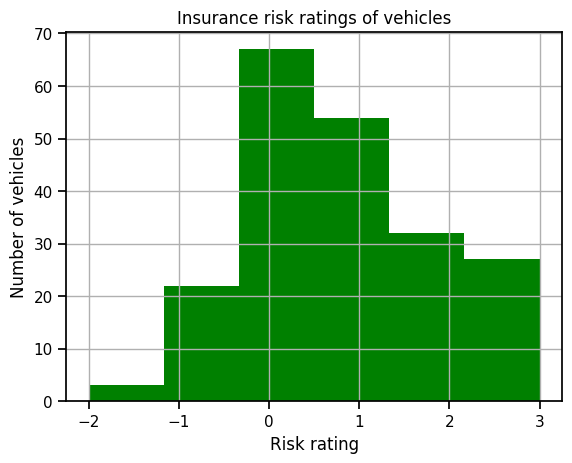

In [76]:
df['symboling'] = df.index
df['symboling'].hist(bins=6,color='green');
plt.title("Insurance risk ratings of vehicles")
plt.ylabel('Number of vehicles')
plt.xlabel('Risk rating');

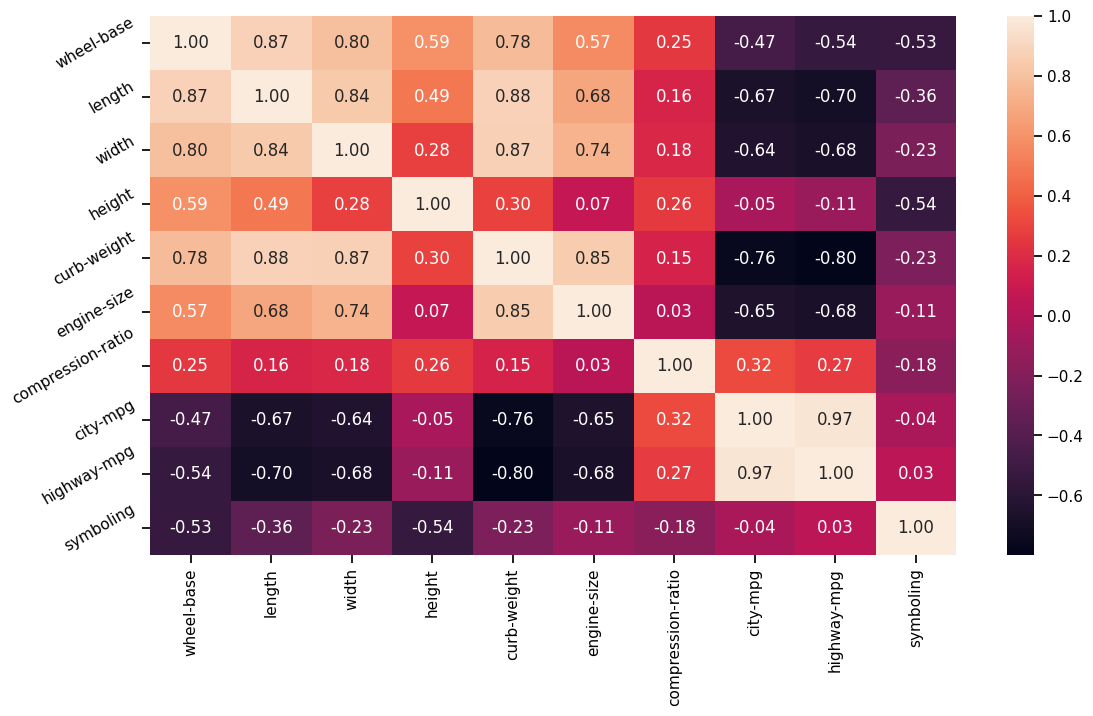

In [77]:
corr = df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
a = sns.heatmap(corr, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

Text(0.5, 0, 'Make')

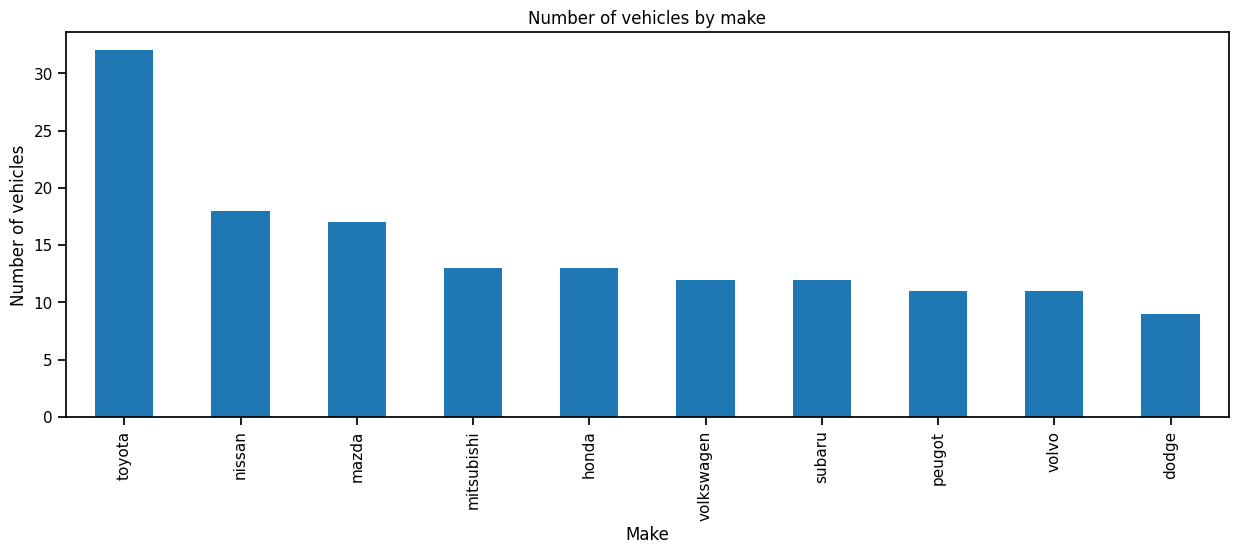

In [78]:
df.make.value_counts().nlargest(10).plot(kind='bar', figsize=(15,5))
plt.title("Number of vehicles by make")
plt.ylabel('Number of vehicles')
plt.xlabel('Make')

O preço é mais correlacionado com tamanho do motor e o peso do veículo, enquanto que o peso é o mais relacionado ao tamanho do motor e altura.

Enquanto que a classificação de risco ( Symboling) é bastante relacionado com a custo médio do seguro ( normalized loss)

### Realize o pré-processamento adequado dos dados. Descreva os passos necessários

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 3 to -1
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  205 non-null    object 
 1   make               205 non-null    object 
 2   fuel-type          205 non-null    object 
 3   aspiration         205 non-null    object 
 4   num-of-doors       205 non-null    object 
 5   body-style         205 non-null    object 
 6   drive-wheels       205 non-null    object 
 7   engine-location    205 non-null    object 
 8   wheel-base         205 non-null    float64
 9   length             205 non-null    float64
 10  width              205 non-null    float64
 11  height             205 non-null    float64
 12  curb-weight        205 non-null    int64  
 13  engine-type        205 non-null    object 
 14  num-of-cylinders   205 non-null    object 
 15  engine-size        205 non-null    int64  
 16  fuel-system        205 non-

Removendo/convertendo dados não numéricos do dataset

In [80]:
df['normalized-losses'].loc[df['normalized-losses'] == '?'].count()
nl = df['normalized-losses'].loc[df['normalized-losses'] != '?']
nlmean = nl.astype(str).astype(int).mean()
df['normalized-losses'] = df['normalized-losses'].replace('?',nlmean).astype(int)

price = df['price'].loc[df['price'] != '?']
pmean = price.astype(str).astype(int).mean()
df['price'] = df['price'].replace('?',pmean).astype(int)

df['bore'].loc[df['bore'] == '?']
df['bore'] = pandas.to_numeric(df['bore'],errors='coerce')
df['stroke'] = pandas.to_numeric(df['stroke'],errors='coerce')
df['horsepower'] = pandas.to_numeric(df['horsepower'],errors='coerce')
df['peak-rpm'] = pandas.to_numeric(df['peak-rpm'],errors='coerce')

df['num-of-doors'].loc[df['num-of-doors'] == '?']
df = df[df['num-of-doors'] != '?']
df['num-of-doors'].loc[df['num-of-doors'] == '?']

df= df.dropna()
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 3 to -1
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  197 non-null    int32  
 1   make               197 non-null    object 
 2   fuel-type          197 non-null    object 
 3   aspiration         197 non-null    object 
 4   num-of-doors       197 non-null    object 
 5   body-style         197 non-null    object 
 6   drive-wheels       197 non-null    object 
 7   engine-location    197 non-null    object 
 8   wheel-base         197 non-null    float64
 9   length             197 non-null    float64
 10  width              197 non-null    float64
 11  height             197 non-null    float64
 12  curb-weight        197 non-null    int64  
 13  engine-type        197 non-null    object 
 14  num-of-cylinders   197 non-null    object 
 15  engine-size        197 non-null    int64  
 16  fuel-system        197 non-

Lidando com outliers

In [81]:
q3=df['engine-size'].describe()[6]
q1=df['engine-size'].describe()[4]
outliers=q3+1.5*(q3-q1)

len(df[df['engine-size'] > outliers])
df['engine-size'][df['engine-size'] > outliers] = df['engine-size'].mean()

q3=df['wheel-base'].describe()[6]
q1=df['wheel-base'].describe()[4]
outliers=q3+1.5*(q3-q1)
len(df[df['wheel-base'] > outliers])
df['wheel-base'][df['wheel-base'] > outliers] = df['wheel-base'].mean()

q3=df['compression-ratio'].describe()[6]
q1=df['compression-ratio'].describe()[4]
outliers=q3+1.5*(q3-q1)
df['compression-ratio'][df['compression-ratio'] > outliers] = df['compression-ratio'].mean()

q3=df['normalized-losses'].describe()[6]
q1=df['normalized-losses'].describe()[4]
outliers=q3+1.5*(q3-q1)
df['normalized-losses'][df['normalized-losses'] > outliers] = df['normalized-losses'].mean()

q3=df['price'].describe()[6]
q1=df['price'].describe()[4]
outliers=q3+1.5*(q3-q1)
df['price'][df['price'] > outliers] = df['price'].mean()

df.loc[df['horsepower'] > 10000]
#Excluding the outlier data for horsepower
df[numpy.abs(df.horsepower-df.horsepower.mean())<=(3*df.horsepower.std())]


,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,symboling
symboling,,,,,,,,,,,,,,,,,,,,,
3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.000000,111.0,5000.0,21,27,13495.0,3
3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.000000,111.0,5000.0,21,27,16500.0,3
1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.000000,154.0,5000.0,19,26,16500.0,1
2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.000000,102.0,5500.0,24,30,13950.0,2
2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.000000,115.0,5500.0,18,22,17450.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,9.500000,114.0,5400.0,23,28,16845.0,-1
-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,8.700000,160.0,5300.0,19,25,19045.0,-1
-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.58,2.87,8.800000,134.0,5500.0,18,23,21485.0,-1


Gráfico histrograma

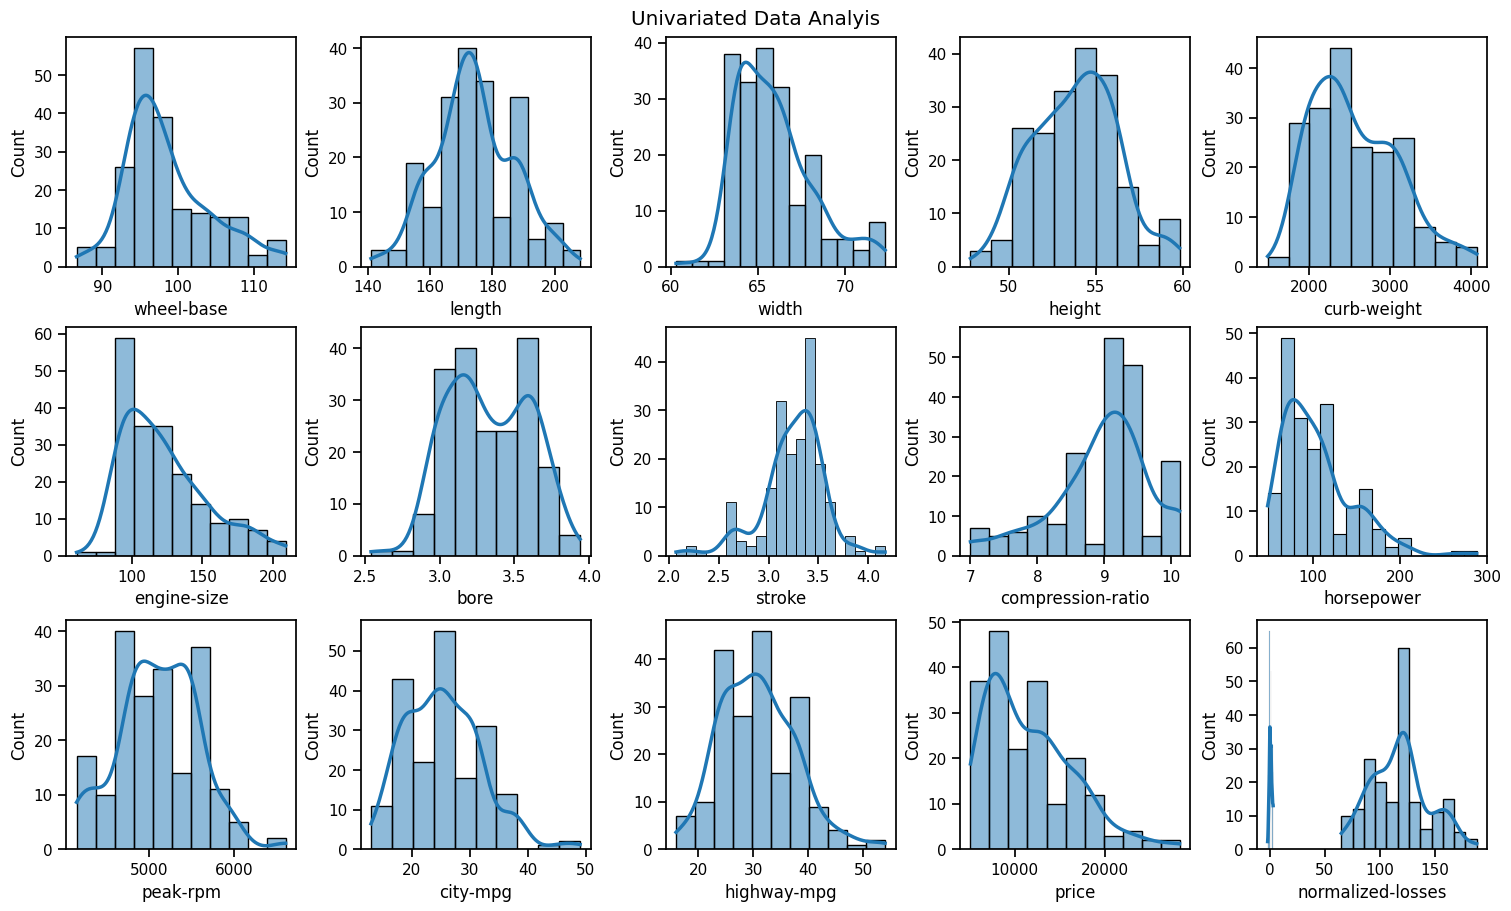

In [82]:
fig, ax = plt.subplots(nrows=3,ncols=5, figsize=(15,9), constrained_layout=True)
plt.suptitle("Univariated Data Analyis")
ax=ax.flatten()
int_cols= df.select_dtypes(exclude='object').columns
for x, i in enumerate(int_cols):
        sns.histplot(df[i], ax=ax[x-1], kde=True)

BoxPlot

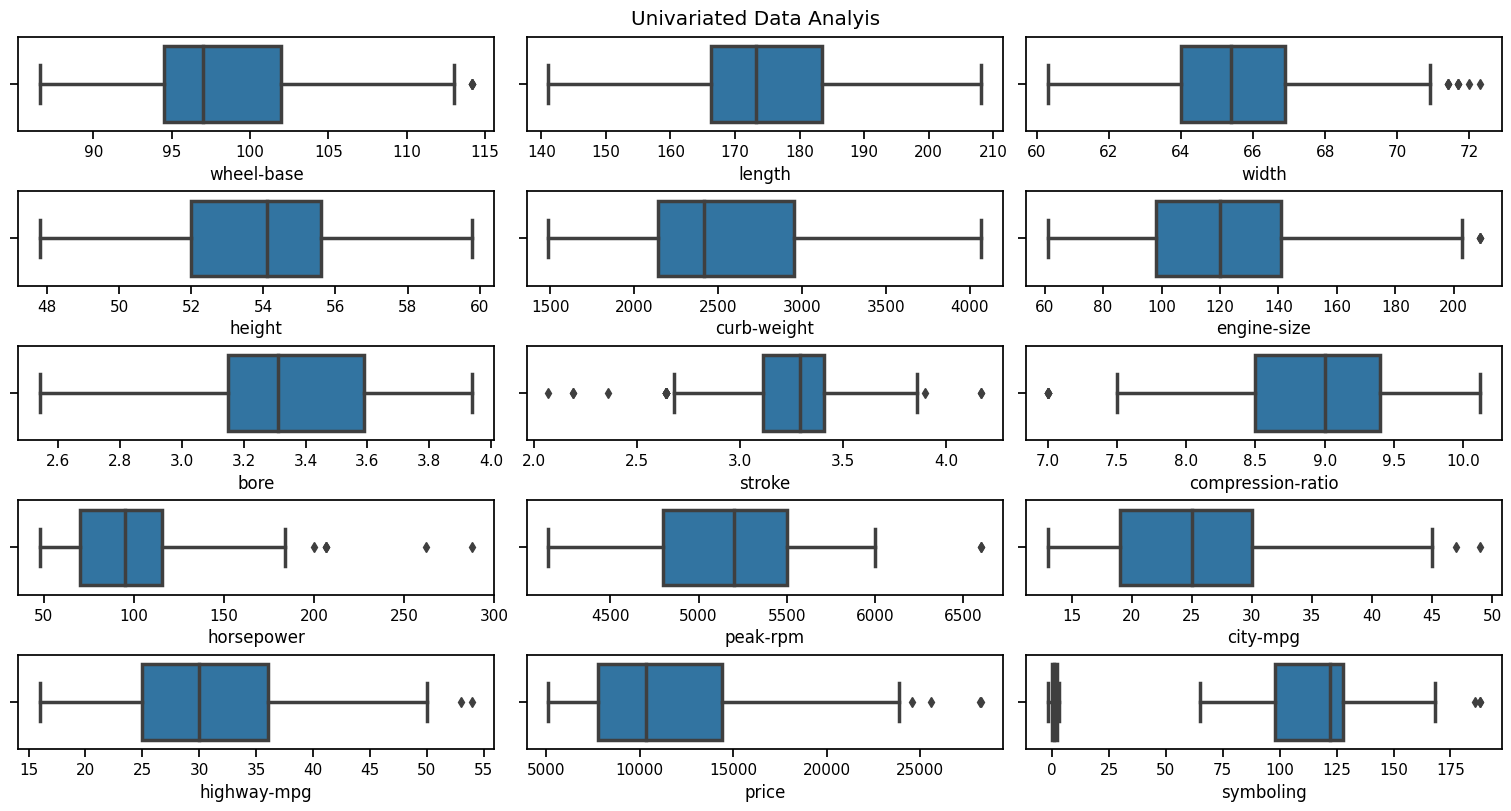

In [83]:
fig, ax = plt.subplots(nrows=5,ncols=3, figsize=(15,8), constrained_layout=True)
plt.suptitle("Univariated Data Analyis")
ax=ax.flatten()
int_cols= df.select_dtypes(exclude='object').columns
for x, i in enumerate(int_cols):
    sns.boxplot(x=df[i], ax=ax[x-1])

Removendo dados não relevantes do dataset

In [84]:
from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(df['make'])
df.drop("make", axis=1, inplace=True)
df["make"] = label


df.drop("fuel-type", axis=1, inplace=True)
df.drop("aspiration", axis=1, inplace=True)
df.drop("num-of-doors", axis=1, inplace=True)
df.drop("body-style", axis=1, inplace=True)
df.drop("drive-wheels", axis=1, inplace=True)
df.drop("engine-location", axis=1, inplace=True)
df.drop("fuel-system", axis=1, inplace=True)
df.drop("engine-type", axis=1, inplace=True)
df.drop("num-of-cylinders", axis=1, inplace=True)

In [85]:
normalized_df = (df-df.mean())/df.std()
normalized_df.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,symboling,make
symboling,,,,,,,,,,,,,,,,,
3,0.157977,-1.770848,-0.429537,-0.831066,-2.099461,-0.025066,0.235501,0.510129,-1.814058,0.038096,0.165233,-0.231034,-0.670372,-0.559180,0.375471,1.801494,-2.012215
3,0.157977,-1.770848,-0.429537,-0.831066,-2.099461,-0.025066,0.235501,0.510129,-1.814058,0.038096,0.165233,-0.231034,-0.670372,-0.559180,0.994189,1.801494,-2.012215
1,0.157977,-0.725802,-0.237422,-0.189386,-0.595180,0.493830,0.968167,-2.361168,0.711182,0.038096,1.236150,-0.231034,-0.977496,-0.704316,0.994189,0.169796,-2.012215
2,1.750832,0.212967,0.194838,0.131454,0.198747,-0.423201,-0.463863,-0.507546,0.487427,1.389952,-0.058912,0.837363,-0.209686,-0.123771,0.469154,0.985645,-1.843603
2,1.750832,0.142117,0.194838,0.223122,0.198747,0.495717,0.435319,-0.507546,0.487427,-1.313760,0.264853,0.837363,-1.131057,-1.284862,1.189791,0.985645,-1.843603


## Clusterização

### use o índice de silhueta e as técnicas:K-Médias

In [86]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 

number of cluster 2, silhouette 0.28761492703974995
number of cluster 3, silhouette 0.2389110719024547
number of cluster 4, silhouette 0.190274533995422
number of cluster 5, silhouette 0.18092598033417856
number of cluster 6, silhouette 0.19433399451859484
number of cluster 7, silhouette 0.19604189650549975
number of cluster 8, silhouette 0.1990860442120692
number of cluster 9, silhouette 0.1996722782272317
number of cluster 10, silhouette 0.19215392807439557


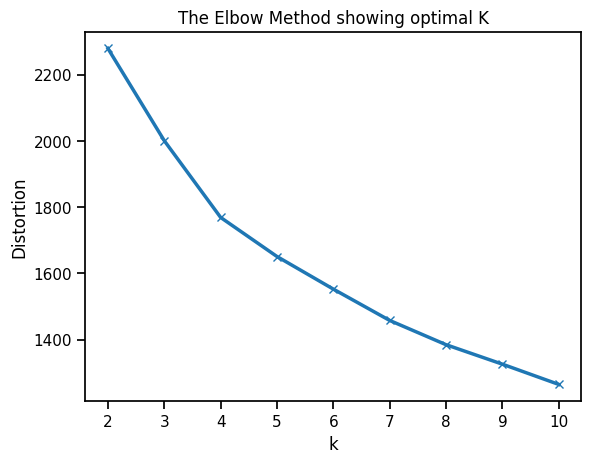

In [87]:
def cluster(x,clusters):
    allscore=[]
    allclusters=[]
    sum_of_squared_distances = []
    x=x
    for i in numpy.arange(1,clusters):

          i+=1
          model=KMeans(n_clusters=i)
          pred=model.fit_predict(x)
          s_score = silhouette_score(x,pred)
          score=silhouette_score(x,pred)
          print("number of cluster {}, silhouette {}".format(i,score))
          allscore.append(s_score)
          allclusters.append(i)
          sum_of_squared_distances.append(model.inertia_)

    plt.plot(allclusters,sum_of_squared_distances, marker='x')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing optimal K')
    plt.show() 

cluster(normalized_df,10)

K-means com 6 clusters conforme o indice de silhueta indicou

In [88]:
model = KMeans(n_clusters = 6)
model = model.fit(normalized_df)
pred = model.predict(normalized_df)
df['cluster'] = pred

In [89]:
def plot_cluster_points(df, labels, ax=None, hue="cluster", legend="auto"):
    pca = PCA(2) 
    pca_data = pandas.DataFrame(pca.fit_transform(df), columns=['PC1','PC2']) 
    pca_data['cluster'] = pandas.Categorical(labels)
    mag_df = pandas.DataFrame(
    zip(
        numpy.min(model.transform(normalized_df), axis=1),
        labels
    ), columns=['distance_to_center', 'cluster']
    )
    fig, ax = plt.subplots(1, 3, figsize=(25, 5))
    sns.scatterplot(x="PC1", y="PC2", hue=hue, data=pca_data, ax=ax[0], legend=legend)

    mag_df.groupby('cluster').sum()['distance_to_center'].plot(kind='bar', ax=ax[1])
    ax[1].set_title('Magnitude do modelo')
    ax[1].set_xlabel('Cluster')
    ax[1].set_ylabel('Magnitude')

    pca_data['cluster'].value_counts().plot(kind='bar', ax=ax[2])
    ax[2].set_title('Cardinalidade do modelo')
    ax[2].set_xlabel('Cluster')
    ax[2].set_ylabel('Quantidade de elementos')

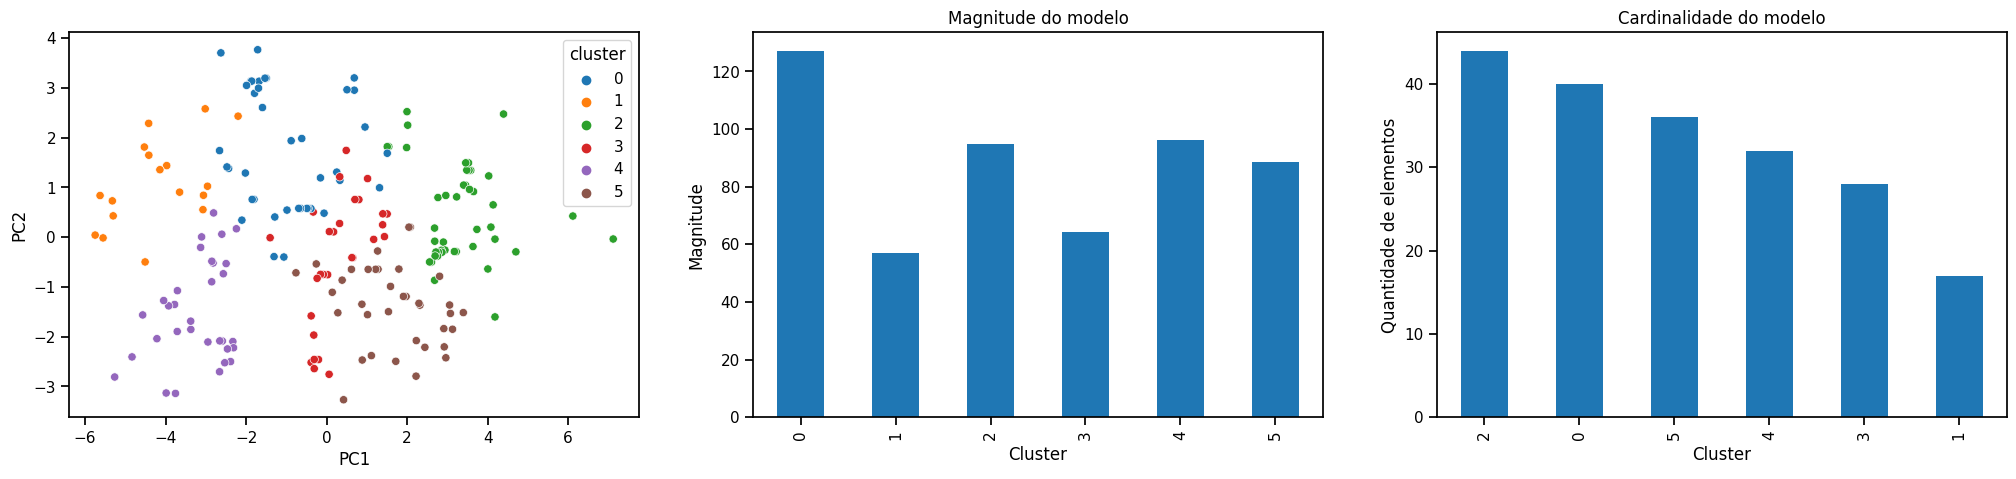

In [90]:
plot_cluster_points(normalized_df, model.labels_)

### use o índice de silhueta e as técnicas:DBscan

In [91]:
pca = PCA(2) 
pca_data = pandas.DataFrame(pca.fit_transform(normalized_df), columns=['PC1','PC2']) 
pca_data

,PC1,PC2
0,0.687241,2.956053
1,0.505040,2.964704
2,-0.618198,1.984620
3,0.251428,1.309400
4,-1.594607,2.607152
...,...,...
192,-2.949363,-2.105532
193,-3.923908,-1.379294
194,-4.047669,-1.272277
195,-2.659301,-2.703463


In [92]:
from itertools import product
from sklearn.cluster import DBSCAN
from  sklearn.metrics import davies_bouldin_score
from  sklearn.metrics import calinski_harabasz_score

eps_values = [0.5,0.6,0.7,0.8] # eps values to be investigated
min_samples = [5,6,7,8,9,10,11,12] # min_samples values to be investigated

DBSCAN_params = list(product(eps_values, min_samples))

no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(pca_data)
    no_of_clusters.append(len(numpy.unique(DBS_clustering.labels_)) - 1)
    sil_score.append(silhouette_score(pca_data, DBS_clustering.labels_))


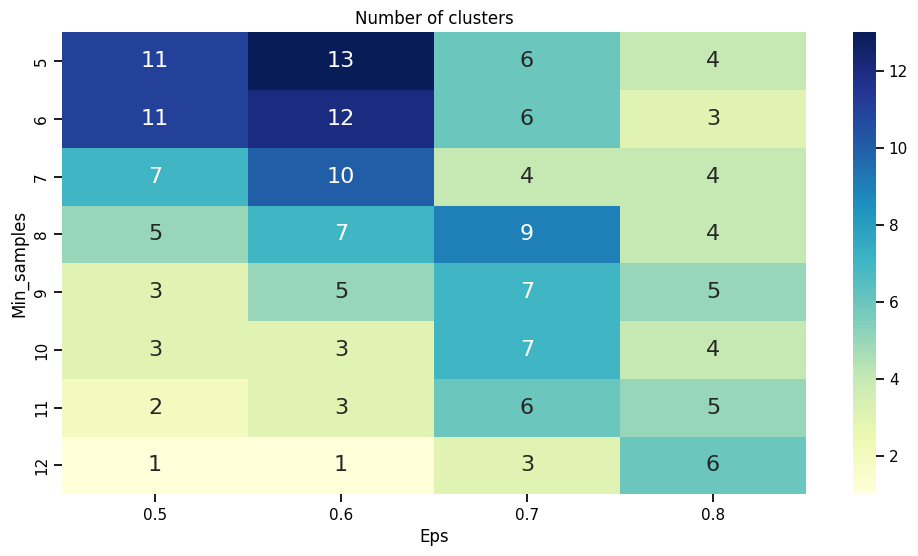

In [93]:
tmp = pandas.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pandas.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()

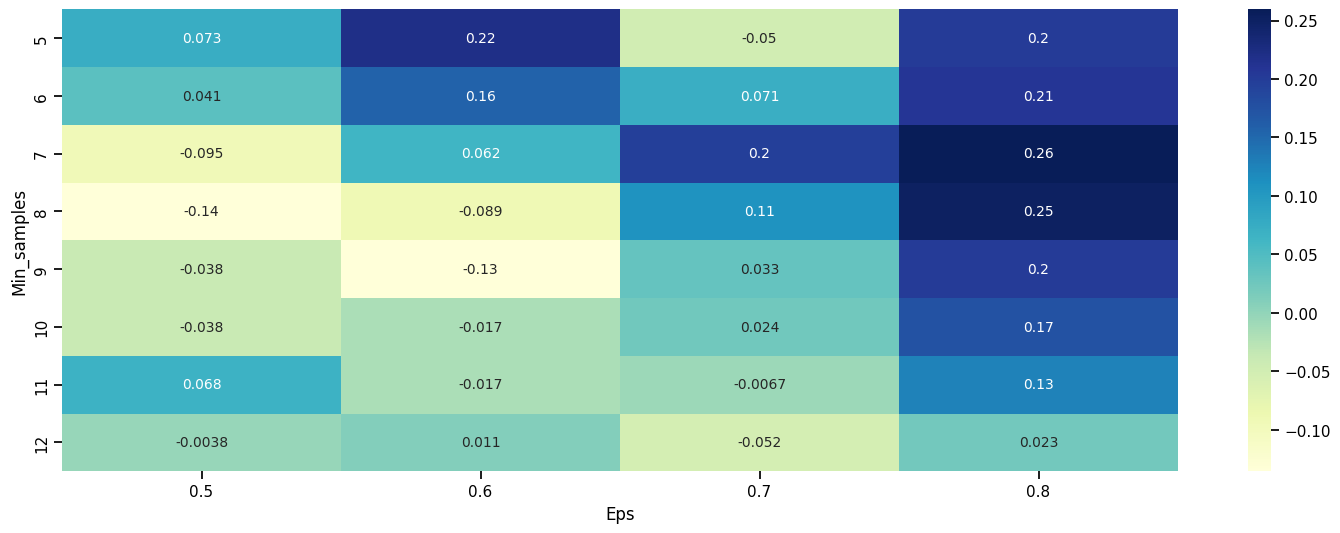

In [94]:
tmp = pandas.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

pivot_1 = pandas.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

Considerando o indice de silhueta o número de cluster ideal é 4, com epsilon = 0.8 e min_samples=7

Estimated no. of clusters: 5
Estimated no. of noise points: 32


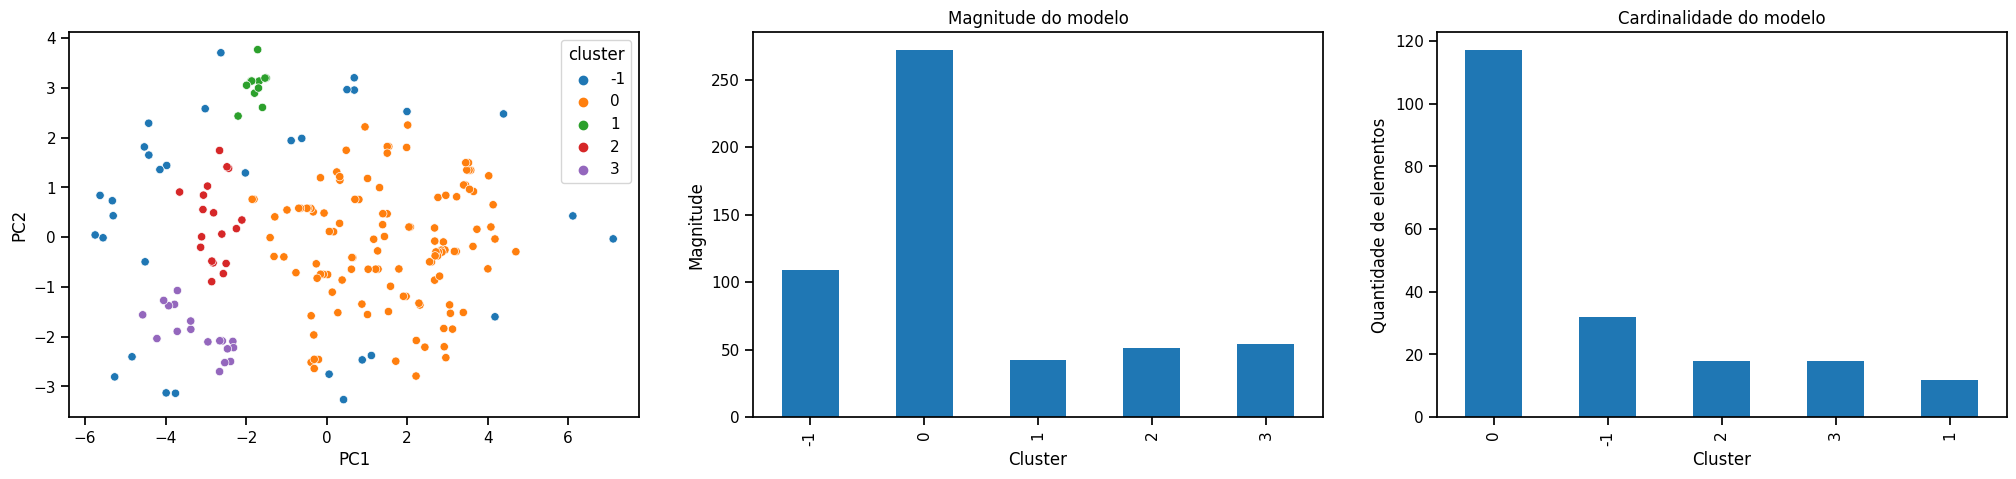

In [95]:
epsilon =0.8
min_samples = 7

db = DBSCAN(eps=epsilon, min_samples=min_samples).fit(pca_data)

no_clusters = len(numpy.unique(db.labels_) )
no_noise = numpy.sum(numpy.array(db.labels_) == -1, axis=0)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

plot_cluster_points(normalized_df, db.labels_)

### Compare os dois resultados, aponte as semelhanças e diferenças e interprete.

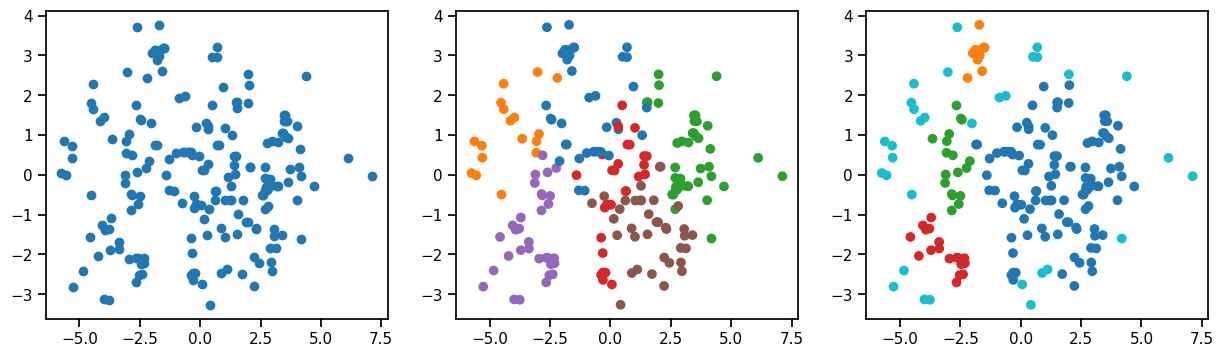

In [96]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

axs[0].scatter(pca_data["PC1"],pca_data["PC2"])
axs[1].scatter(pca_data["PC1"],pca_data["PC2"], c=[sns.color_palette().as_hex()[l] for l in model.labels_])
axs[2].scatter(pca_data["PC1"],pca_data["PC2"], c=[sns.color_palette().as_hex()[l] for l in db.labels_])

Vimos no gráfico acima, que apesar do DBSCan remover os dados ruidosos, o K-means classifica melhor esse dataset, para isso foi utilizado as medidas de qualidade de clusterização 
(magnitude e cardinalidade)

### Escolha mais duas medidas de validação para comparar com o índice de silhueta e analise os resultados encontrados. Observe, para a escolha, medidas adequadas aos algoritmos.


#### DBSCAN -> davies_bouldin_score

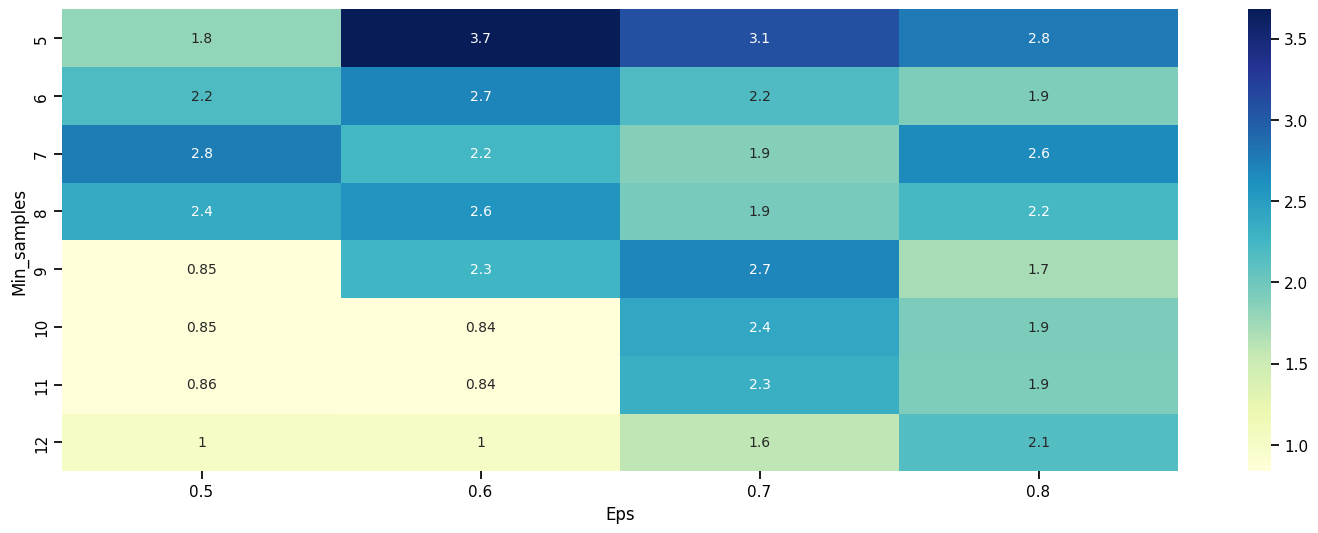

In [97]:
no_of_clusters = []
db_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(pca_data)
    no_of_clusters.append(len(numpy.unique(DBS_clustering.labels_)) - 1)
    db_score.append(davies_bouldin_score(pca_data, DBS_clustering.labels_))


tmp = pandas.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['db_score'] = db_score

pivot_1 = pandas.pivot_table(tmp, values='db_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

Estimated no. of clusters: 7
Estimated no. of noise points: 19


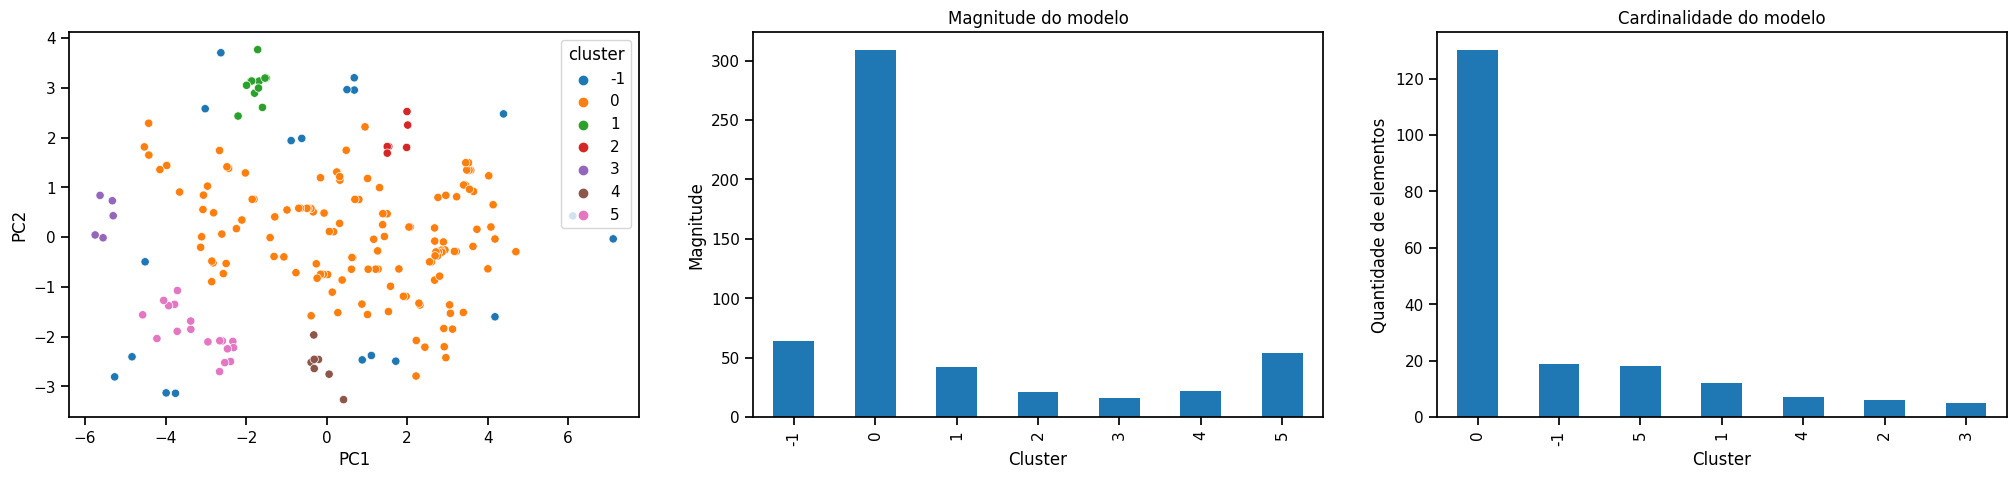

In [98]:
epsilon =0.7
min_samples = 5

db = DBSCAN(eps=epsilon, min_samples=min_samples).fit(pca_data)

no_clusters = len(numpy.unique(db.labels_) )
no_noise = numpy.sum(numpy.array(db.labels_) == -1, axis=0)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

plot_cluster_points(normalized_df, db.labels_)

#### DBSCAN -> calinski_harabasz_score

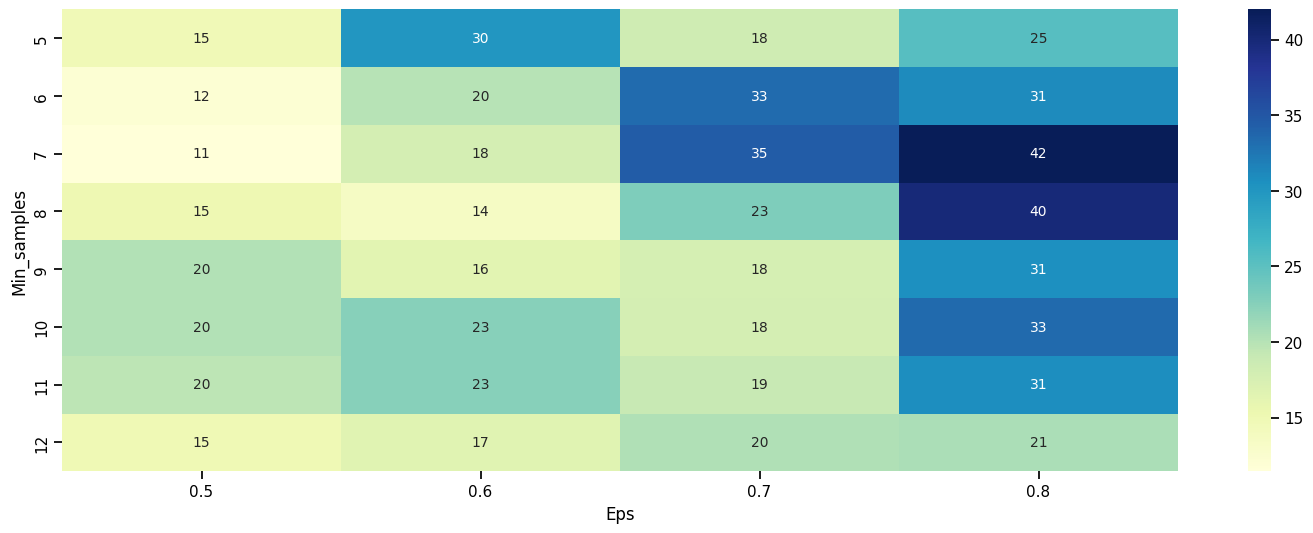

In [99]:
no_of_clusters = []
db_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(pca_data)
    no_of_clusters.append(len(numpy.unique(DBS_clustering.labels_)) - 1)
    db_score.append(calinski_harabasz_score(pca_data, DBS_clustering.labels_))


tmp = pandas.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['db_score'] = db_score

pivot_1 = pandas.pivot_table(tmp, values='db_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

Estimated no. of clusters: 5
Estimated no. of noise points: 32


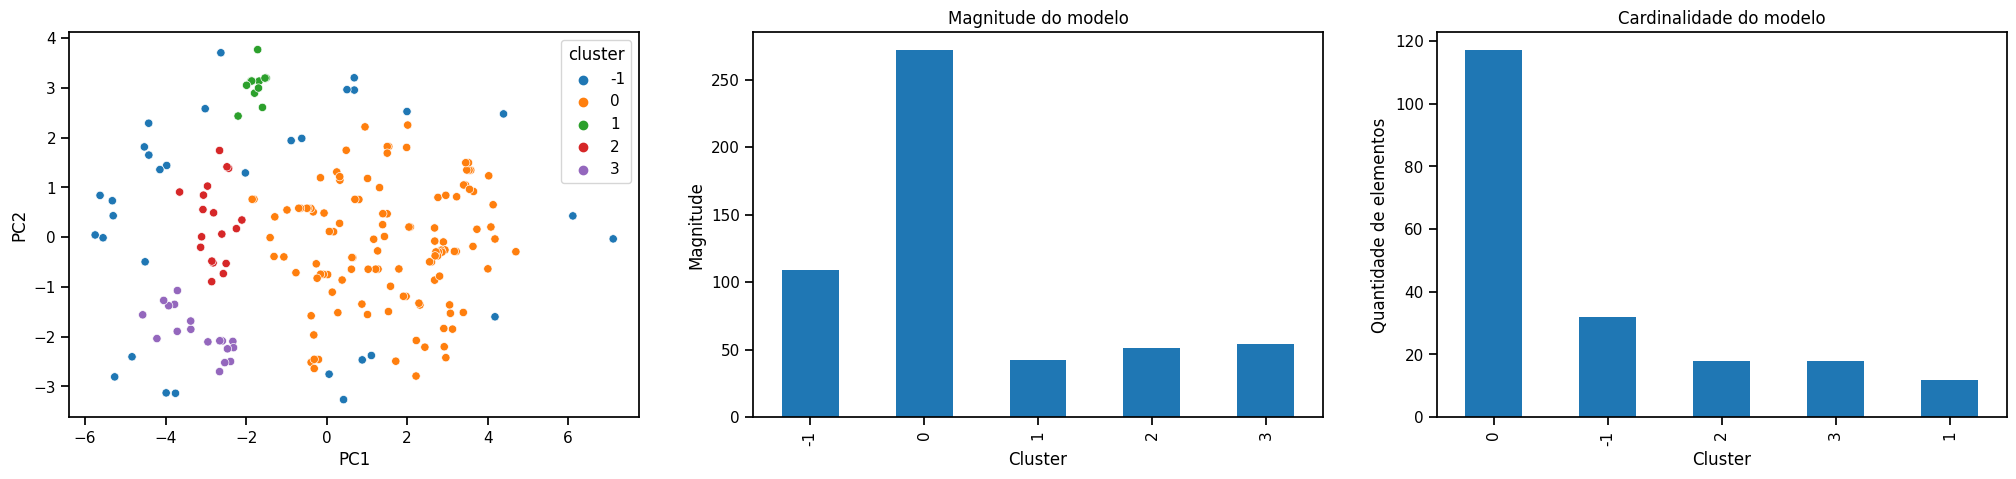

In [100]:
epsilon =0.8
min_samples = 7

db = DBSCAN(eps=epsilon, min_samples=min_samples).fit(pca_data)

no_clusters = len(numpy.unique(db.labels_) )
no_noise = numpy.sum(numpy.array(db.labels_) == -1, axis=0)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

plot_cluster_points(normalized_df, db.labels_)

Para o DBScan vimos que o cluster 0 é sempre maior em magnitude e cardinalidade, utilizando os três tipos de validações mostrados acima

#### K-means -> distortions

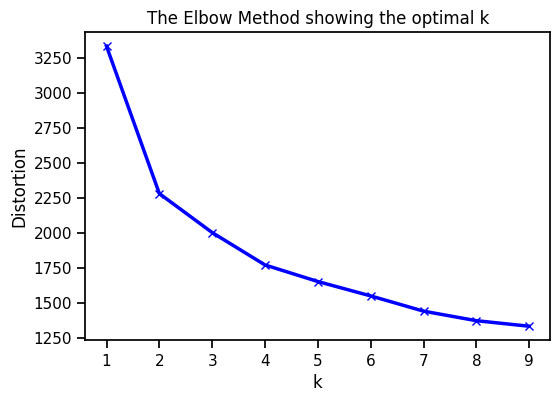

In [124]:
### We calculate the distortions for each value of k
### Distortion is the sum of squared distances from each point to its assigned center.
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(normalized_df)
    distortions.append(kmeanModel.inertia_)
### Plot 
plt.figure(figsize=(6,4))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

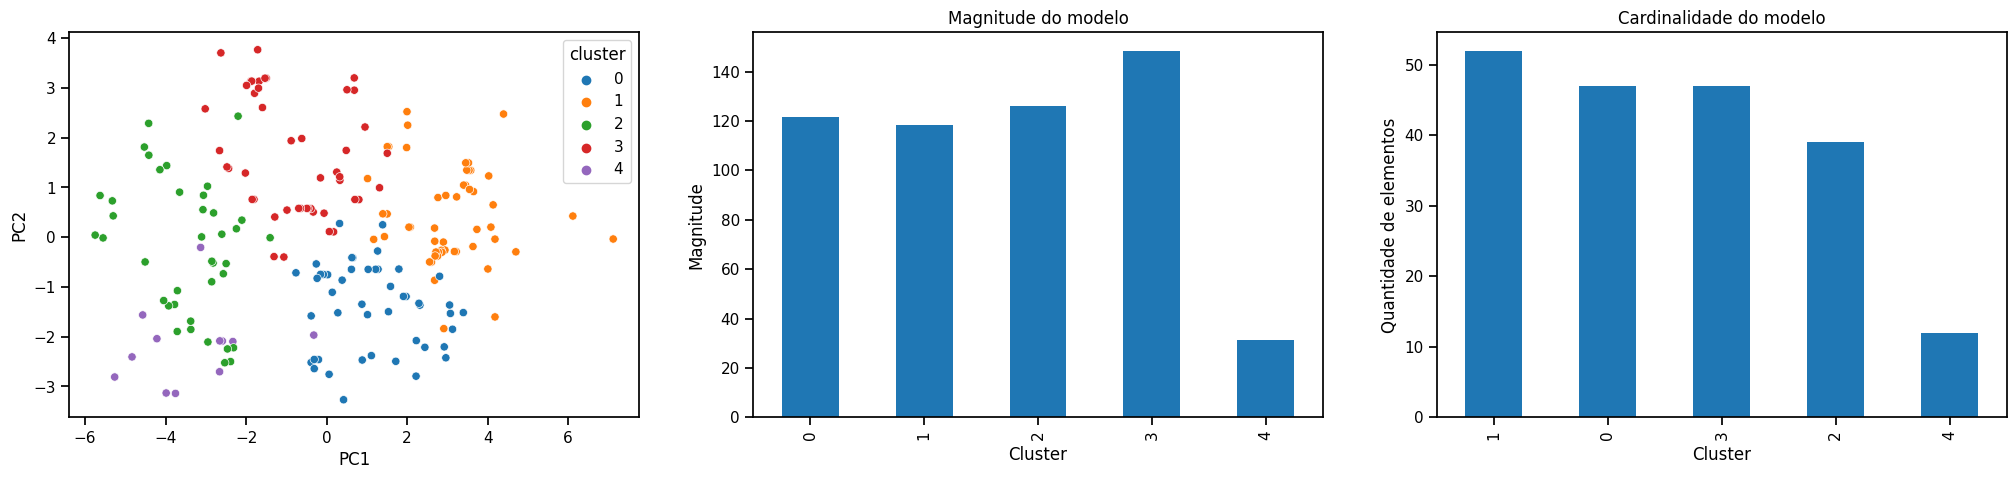

In [125]:
model = KMeans(n_clusters = 5)
model = model.fit(normalized_df)
pred = model.predict(normalized_df)
plot_cluster_points(normalized_df, model.labels_)

#### k-means -> davies_bouldin_score

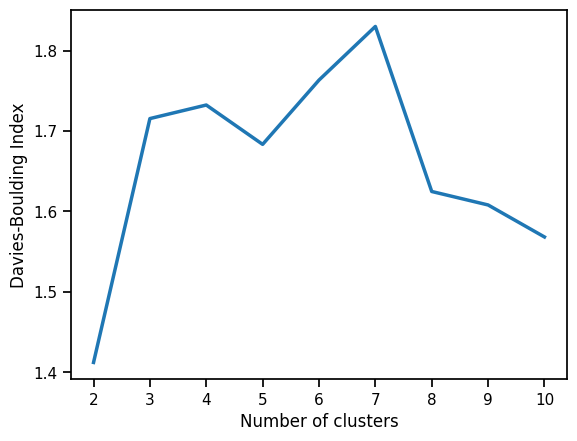

In [119]:
results = {}

for i in range(2,11):
    kmeans = KMeans(n_clusters=i, random_state=30)
    labels = kmeans.fit_predict(normalized_df)
    db_index = davies_bouldin_score(normalized_df, labels)
    results.update({i: db_index})

plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Davies-Boulding Index")
plt.show()

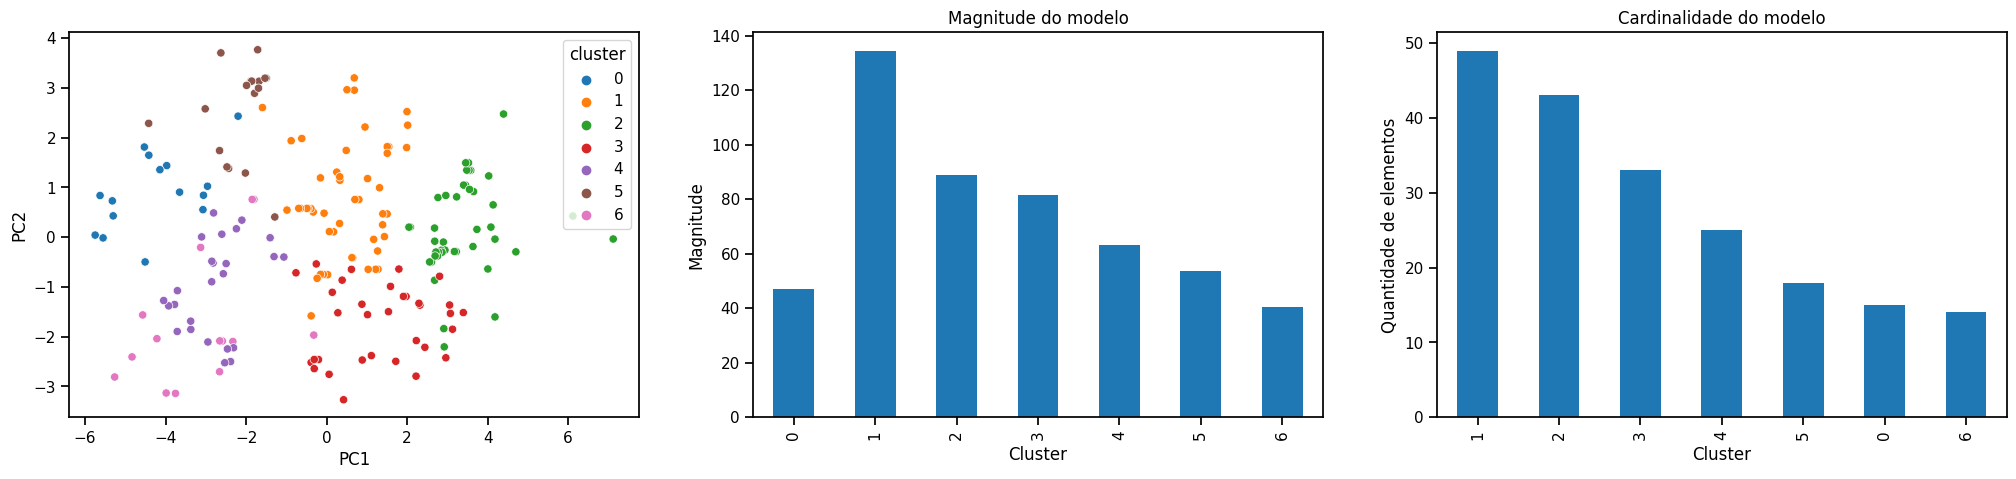

In [121]:
model = KMeans(n_clusters = 7)
model = model.fit(normalized_df)
pred = model.predict(normalized_df)
plot_cluster_points(normalized_df, model.labels_)

No K-means, tanto por davies_bouldin quanto por distortion, nenhum apresentou melhor resultado do que no indice de silhueta

### Realizando a análise, responda: A silhueta é um o índice indicado para escolher o número de clusters para o algoritmo de DBScan?

O método de silhueta apresenta algumas vantagens, entre elas:

• Medida normalizada, permite fácil interpretação do resultado.
• Analisa coesão e separação, avaliações clássicas e intuitivas
de qualidade

Porém apresenta uma desvantagem:
• Tende a gerar números maiores para clusters convexos do
que para clusters baseados em densidade ou outros
conceitos

Ou seja, não deve ser utilizada como critério de comparação entre Kmeans e DBSCAN, pois o método de silhueta não descreve bem a quantidade de cluster quando utilizado com o algoritimo DBScan

## Medidas de similaridade


#### Um determinado problema, apresenta 10 séries temporais distintas. Gostaríamos de agrupá-las em 3 grupos, de acordo com um critério de similaridade, baseado no valor máximo de correlação cruzada entre elas. Descreva em tópicos todos os passos necessários. 

O primeiro passo é normalizar os dados, utilizando funções como Normalizer(), para manter todos os dados na mesma escala. O Segundo passo é aplicar a correlação de pearson com os valores normalizados entre -1 e 1. Sendo -1 correlacionado negativamente, 0 não correlacionado e 1 totalmente correlacionado, a função corr() realiza essa correlação e retorna os coeficientes.

Após isso é utiliazdo algum algoritmo de clusterização, como por exemplo o k-means, como já se sabe a quantidade de cluster não é necessário utilizar algum algoritimo de validação para descobrir a quantidade de clusters, como o indice de silhueta.

Para aplicar o K-means em uma serie temporal é utilizado o make_pipeline() do SkLearn, passando como paramêtros a função de normalização e o K-means.

Alternativamente pode-se aplicar A PCA dos dados antes de realizar o k-means, porém, a desvantagem da PCA é a possível perca de dados relevantes quando sumariza todas as colunas em apenas 2.

#### Para o problema da questão anterior, indique qual algoritmo de clusterização você usaria. Justifique.

Utilizaria o K-means, como mencionado acima, pois é o algoritimo de clusterização mais indicado para trabalhar com time-series e pode ser utilizado em conjunto com a distância euclidiana ou outros algoritimos como o DTW, que será explicado abaixo.

#### Indique um caso de uso para essa solução projetada.

Investidores analisam a correlação cruzada para entender como os preços de duas ou mais ações perfomam entre elas, utilizado em estrategias de negociação de pares ( pair trading).

Também é utilizado para gestão de patrimonio, para garantir a diversificação entre os ativos e garantir o menor risco de perder grandes quantias, caso duas ações variam na mesma correlação, quando as duas cairem o prejuizo seria grande, mas caso tenha ativos descorrelacionados a perda é menor, pois variam em direções opostas.

#### Sugira outra estratégia para medir a similaridade entre séries temporais. Descreva em tópicos os passos necessários.


Dynamic Time Warping ( DTW) - Calcula o alinhamento que minimiza a distância entre as séries temporais


DTW é calculado com a raiz quadrada da soma do quadrado das distâncias entre cada elemento em X e o ponto mais próximo em Y. DTW compara cada elemento em uma série em X com uma serie em Y com a diferença entre eles ( x-y). após isso, cada elemento x em X, o algoritimo seleciona o ponto mais próximo em Y para calcular a distância.
